<a href="https://colab.research.google.com/github/dgailh/RealTime-Object-Detection-CV2025/blob/main/CV_project_group_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install ultralytics
from ultralytics import YOLO


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
# Install gdown if it's not already installed
!pip install gdown



In [3]:
# Import gdown
import gdown

# dataset for plates detection only
plates_detection = 'https://drive.google.com/uc?id=1ptlniGxVzGcpC_DZS-m4e6KhTVCjyKvd'

# saudi plates without cars, plates only for reading plate numbers
saudi_plates = 'https://drive.google.com/uc?id=1JXqBsTCDJrwM_fg4tO8wWL0GQk3mW5t4'
# saudi plates within cars for fine tuning to saudi plates
Saudi_PlatesNcars = 'https://drive.google.com/uc?id=1EOk9nQQjN0g7DbtlgM2lDPco3ANFlweU'

# Download the zip files
gdown.download(plates_detection, 'plates_detection.zip', quiet=False)
gdown.download(saudi_plates, 'saudi_plates.zip', quiet=False)
gdown.download(Saudi_PlatesNcars, 'Saudi_PlatesNcars.zip', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1ptlniGxVzGcpC_DZS-m4e6KhTVCjyKvd
From (redirected): https://drive.google.com/uc?id=1ptlniGxVzGcpC_DZS-m4e6KhTVCjyKvd&confirm=t&uuid=f660d773-7b6c-47f6-9a63-b4e0dda39c41
To: /content/plates_detection.zip
100%|██████████| 451M/451M [00:07<00:00, 58.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JXqBsTCDJrwM_fg4tO8wWL0GQk3mW5t4
To: /content/saudi_plates.zip
100%|██████████| 9.74M/9.74M [00:00<00:00, 25.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1EOk9nQQjN0g7DbtlgM2lDPco3ANFlweU
From (redirected): https://drive.google.com/uc?id=1EOk9nQQjN0g7DbtlgM2lDPco3ANFlweU&confirm=t&uuid=b952b4e7-0bf3-4c0d-b89e-913f839366b0
To: /content/Saudi_PlatesNcars.zip
100%|██████████| 36.8M/36.8M [00:01<00:00, 30.2MB/s]


'Saudi_PlatesNcars.zip'

In [4]:
import os, zipfile

def unzip(zip_path, out_dir):
    os.makedirs(out_dir, exist_ok=True)
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(out_dir)

base = "/content/datasets"
unzip("plates_detection.zip", f"{base}/plates_detection")
unzip("saudi_plates.zip", f"{base}/saudi_plates")
unzip("Saudi_PlatesNcars.zip", f"{base}/saudi_cars")

print("Done. Top-level folders:")
!ls -la /content/datasets

Done. Top-level folders:
total 20
drwxr-xr-x 5 root root 4096 Dec 18 18:19 .
drwxr-xr-x 1 root root 4096 Dec 18 18:19 ..
drwxr-xr-x 5 root root 4096 Dec 18 18:19 plates_detection
drwxr-xr-x 5 root root 4096 Dec 18 18:19 saudi_cars
drwxr-xr-x 5 root root 4096 Dec 18 18:19 saudi_plates


In [5]:
!find /content/datasets -maxdepth 3 -type d | sed -e 's;[^/]*/;  ;g'

    datasets
      saudi_plates
        train
          labels
          images
        valid
          labels
          images
        test
          labels
          images
      plates_detection
        train
          labels
          images
        valid
          labels
          images
        test
          labels
          images
      saudi_cars
        train
          labels
          images
        valid
          labels
          images
        test
          labels
          images


In [6]:
import glob

def count_imgs(path):
    return len(glob.glob(path + "/*"))

print("Base detection test images:",
      count_imgs("/content/datasets/plates_detection/test/images"))

print("Saudi cars test images:",
      count_imgs("/content/datasets/saudi_cars/test/images"))

print("Saudi plates-only images (for OCR):",
      count_imgs("/content/datasets/saudi_plates/test/images"))


Base detection test images: 226
Saudi cars test images: 41
Saudi plates-only images (for OCR): 42


In [7]:
!ls -la /content/datasets/plates_detection
!cat /content/datasets/plates_detection/data.yaml

total 32
drwxr-xr-x 5 root root 4096 Dec 18 18:19 .
drwxr-xr-x 5 root root 4096 Dec 18 18:19 ..
-rw-r--r-- 1 root root  303 Dec 18 18:19 data.yaml
-rw-r--r-- 1 root root  157 Dec 18 18:19 README.dataset.txt
-rw-r--r-- 1 root root 1475 Dec 18 18:19 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Dec 18 18:19 test
drwxr-xr-x 4 root root 4096 Dec 18 18:19 train
drwxr-xr-x 4 root root 4096 Dec 18 18:19 valid
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['LicensePlate']

roboflow:
  workspace: haeun-kim-ri91b
  project: license-plate-detection-wienp
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/haeun-kim-ri91b/license-plate-detection-wienp/dataset/2

In [8]:
!ls -la /content/datasets/saudi_cars
!cat /content/datasets/saudi_cars/data.yaml

total 32
drwxr-xr-x 5 root root 4096 Dec 18 18:19 .
drwxr-xr-x 5 root root 4096 Dec 18 18:19 ..
-rw-r--r-- 1 root root  320 Dec 18 18:19 data.yaml
-rw-r--r-- 1 root root  178 Dec 18 18:19 README.dataset.txt
-rw-r--r-- 1 root root 1106 Dec 18 18:19 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Dec 18 18:19 test
drwxr-xr-x 4 root root 4096 Dec 18 18:19 train
drwxr-xr-x 4 root root 4096 Dec 18 18:19 valid
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['Number-Plate', 'Plate']

roboflow:
  workspace: my-projects-lcb5t
  project: license-plate-recognition-b09ny
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/my-projects-lcb5t/license-plate-recognition-b09ny/dataset/1

In [9]:
import yaml

def fix_yaml(yaml_path, nc, names):
    with open(yaml_path, "r") as f:
        d = yaml.safe_load(f)

    d["train"] = "train/images"
    d["val"]   = "valid/images"
    d["test"]  = "test/images"
    d["nc"]    = nc
    d["names"] = names

    # keep roboflow metadata if present
    with open(yaml_path, "w") as f:
        yaml.safe_dump(d, f, sort_keys=False)

# plates_detection: keep 1 class
fix_yaml("/content/datasets/plates_detection/data.yaml", 1, ["LicensePlate"])

# saudi_cars: we will also make it 1 class later (after merging labels)
fix_yaml("/content/datasets/saudi_cars/data.yaml", 1, ["LicensePlate"])

print("✅ YAML files updated.")
!cat /content/datasets/plates_detection/data.yaml
print("------")
!cat /content/datasets/saudi_cars/data.yaml


✅ YAML files updated.
train: train/images
val: valid/images
test: test/images
nc: 1
names:
- LicensePlate
roboflow:
  workspace: haeun-kim-ri91b
  project: license-plate-detection-wienp
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/haeun-kim-ri91b/license-plate-detection-wienp/dataset/2
------
train: train/images
val: valid/images
test: test/images
nc: 1
names:
- LicensePlate
roboflow:
  workspace: my-projects-lcb5t
  project: license-plate-recognition-b09ny
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/my-projects-lcb5t/license-plate-recognition-b09ny/dataset/1


In [10]:
!ls -la /content/datasets/plates_detection
!cat /content/datasets/plates_detection/data.yaml

total 32
drwxr-xr-x 5 root root 4096 Dec 18 18:19 .
drwxr-xr-x 5 root root 4096 Dec 18 18:19 ..
-rw-r--r-- 1 root root  291 Dec 18 18:19 data.yaml
-rw-r--r-- 1 root root  157 Dec 18 18:19 README.dataset.txt
-rw-r--r-- 1 root root 1475 Dec 18 18:19 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Dec 18 18:19 test
drwxr-xr-x 4 root root 4096 Dec 18 18:19 train
drwxr-xr-x 4 root root 4096 Dec 18 18:19 valid
train: train/images
val: valid/images
test: test/images
nc: 1
names:
- LicensePlate
roboflow:
  workspace: haeun-kim-ri91b
  project: license-plate-detection-wienp
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/haeun-kim-ri91b/license-plate-detection-wienp/dataset/2


In [11]:
!ls -la /content/datasets/saudi_cars
!cat /content/datasets/saudi_cars/data.yaml

total 32
drwxr-xr-x 5 root root 4096 Dec 18 18:19 .
drwxr-xr-x 5 root root 4096 Dec 18 18:19 ..
-rw-r--r-- 1 root root  299 Dec 18 18:19 data.yaml
-rw-r--r-- 1 root root  178 Dec 18 18:19 README.dataset.txt
-rw-r--r-- 1 root root 1106 Dec 18 18:19 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Dec 18 18:19 test
drwxr-xr-x 4 root root 4096 Dec 18 18:19 train
drwxr-xr-x 4 root root 4096 Dec 18 18:19 valid
train: train/images
val: valid/images
test: test/images
nc: 1
names:
- LicensePlate
roboflow:
  workspace: my-projects-lcb5t
  project: license-plate-recognition-b09ny
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/my-projects-lcb5t/license-plate-recognition-b09ny/dataset/1


In [12]:
import glob

label_files = glob.glob("/content/datasets/saudi_cars/*/labels/*.txt")

changed = 0
for lf in label_files:
    with open(lf, "r") as f:
        lines = f.read().strip().splitlines()

    new_lines = []
    for line in lines:
        if not line.strip():
            continue
        parts = line.split()
        # YOLO format: class x y w h
        parts[0] = "0"  # force single class
        new_lines.append(" ".join(parts))

    with open(lf, "w") as f:
        f.write("\n".join(new_lines) + ("\n" if new_lines else ""))

    changed += 1

print(f"✅ Updated labels in {changed} files (Saudi classes merged to 1 class).")


✅ Updated labels in 951 files (Saudi classes merged to 1 class).


In [13]:
import glob
print("plates_detection test images:", len(glob.glob("/content/datasets/plates_detection/test/images/*")))
print("saudi_cars test images:", len(glob.glob("/content/datasets/saudi_cars/test/images/*")))


plates_detection test images: 226
saudi_cars test images: 41


In [14]:
import os, glob

sample = glob.glob("/content/datasets/saudi_cars/train/labels/*.txt")[:3]
print("Sample label files:", sample)

for p in sample:
    print("\nFILE:", os.path.basename(p))
    !head -n 5 "$p"


Sample label files: ['/content/datasets/saudi_cars/train/labels/car99_jpg.rf.ecdc1150a4b85666bcf203bd9591da17.txt', '/content/datasets/saudi_cars/train/labels/car128_webp_jpg.rf.eb583c15614d2b8ce809508dfe7e5fae.txt', '/content/datasets/saudi_cars/train/labels/ckie7pj5t0066246adcswvogc_jpeg.rf.b0668e3ca5d98cc6d57c091f560dae13.txt']

FILE: car99_jpg.rf.ecdc1150a4b85666bcf203bd9591da17.txt
0 0.4609375 0.75625 0.8390625 0.39375
0 0.0074489484375 0.016594726562500002 0.009234334375 0.9954633046874999 0.9965676890624999 0.997249534375 0.9937499593749999 0.0116071359375 0.0074489484375 0.016594726562500002

FILE: car128_webp_jpg.rf.eb583c15614d2b8ce809508dfe7e5fae.txt
0 0.7958333015625 0.47870369999999995 0.5054664390625 0.5134167984375 0.3992557359375 0.5226702999999999 0.0681282078125 0.520819615625 0.0941602265625 0.6355637515625 0.40446211249999997 0.6355637515625 0.5085902828125 0.6281608484375 0.7845297859375 0.604101628125 0.7958333015625 0.47870369999999995
0 0.7805326265625 0.6096318

In [15]:
sample = glob.glob("/content/datasets/plates_detection/train/labels/*.txt")[:3]
print("Sample label files:", sample)

for p in sample:
    print("\nFILE:", os.path.basename(p))
    !head -n 5 "$p"

Sample label files: ['/content/datasets/plates_detection/train/labels/3ajnb28ju8ha1_jpg.rf.866ad3467a89866f3e77f4c12f7ad14a.txt', '/content/datasets/plates_detection/train/labels/b-yRIwkM0VqCfp1-xVypTfqD8aOnDn0OIybZalLFrjY_jpg.rf.6c19278139cc18902b67a1a1c6468ccc.txt', '/content/datasets/plates_detection/train/labels/dyqreypgc1pa1_jpg.rf.fd19bff98eed06250627cae8bcd600da.txt']

FILE: 3ajnb28ju8ha1_jpg.rf.866ad3467a89866f3e77f4c12f7ad14a.txt
0 0.4731928359375 0.6390032734375 0.6982089546875 0.6009288984375 0.6988951203125 0.597123071875 0.6993846921875 0.491824665625 0.4632285140625 0.5290524578125 0.467789478125 0.638332325 0.4731928359375 0.6390032734375
FILE: b-yRIwkM0VqCfp1-xVypTfqD8aOnDn0OIybZalLFrjY_jpg.rf.6c19278139cc18902b67a1a1c6468ccc.txt
0 0.377918846875 0.5808656015625 0.40062615937499996 0.5097510875 0.40079359062500003 0.505652034375 0.3130013453125 0.45339902812500005 0.28821582968750004 0.5257072484374999 0.3754152125 0.5807055531249999 0.377918846875 0.5808656015625
FILE:

In [16]:
import glob

label_files = glob.glob("/content/datasets/saudi_cars/*/labels/*.txt")

kept, removed = 0, 0

for lf in label_files:
    with open(lf, "r") as f:
        lines = [ln.strip() for ln in f.read().splitlines() if ln.strip()]

    new_lines = []
    for ln in lines:
        parts = ln.split()
        # Keep only bbox format: class + 4 numbers
        if len(parts) == 5:
            new_lines.append(ln)
            kept += 1
        else:
            removed += 1

    with open(lf, "w") as f:
        f.write("\n".join(new_lines) + ("\n" if new_lines else ""))

print(f"✅ Cleaned labels. Kept bbox lines: {kept}, Removed segmentation lines: {removed}")


✅ Cleaned labels. Kept bbox lines: 1183, Removed segmentation lines: 751


In [17]:
import os, glob

sample = glob.glob("/content/datasets/saudi_cars/train/labels/*.txt")[:3]
for p in sample:
    print("\nFILE:", os.path.basename(p))
    !cat "$p"



FILE: car99_jpg.rf.ecdc1150a4b85666bcf203bd9591da17.txt
0 0.4609375 0.75625 0.8390625 0.39375

FILE: car128_webp_jpg.rf.eb583c15614d2b8ce809508dfe7e5fae.txt

FILE: ckie7pj5t0066246adcswvogc_jpeg.rf.b0668e3ca5d98cc6d57c091f560dae13.txt
0 0.4984375 0.515625 0.9109375 0.48125
0 0.4734375 0.6203125 0.7234375 0.184375


In [18]:
import glob

label_files = glob.glob("/content/datasets/plates_detection/*/labels/*.txt")

kept, removed = 0, 0

for lf in label_files:
    with open(lf, "r") as f:
        lines = [ln.strip() for ln in f.read().splitlines() if ln.strip()]

    new_lines = []
    for ln in lines:
        parts = ln.split()
        if len(parts) == 5:       # bbox format only
            new_lines.append(ln)
            kept += 1
        else:                     # segmentation polygon -> remove
            removed += 1

    with open(lf, "w") as f:
        f.write("\n".join(new_lines) + ("\n" if new_lines else ""))

print(f"✅ plates_detection cleaned. Kept bbox lines: {kept}, Removed seg lines: {removed}")


✅ plates_detection cleaned. Kept bbox lines: 4220, Removed seg lines: 3167


In [19]:
import os, glob
sample = glob.glob("/content/datasets/plates_detection/train/labels/*.txt")[:3]

for p in sample:
    print("\nFILE:", os.path.basename(p))
    !cat "$p"



FILE: 3ajnb28ju8ha1_jpg.rf.866ad3467a89866f3e77f4c12f7ad14a.txt

FILE: b-yRIwkM0VqCfp1-xVypTfqD8aOnDn0OIybZalLFrjY_jpg.rf.6c19278139cc18902b67a1a1c6468ccc.txt

FILE: dyqreypgc1pa1_jpg.rf.fd19bff98eed06250627cae8bcd600da.txt


In [20]:
import glob, os

label_files = glob.glob("/content/datasets/plates_detection/*/labels/*.txt")
empty = sum(1 for f in label_files if os.path.getsize(f) == 0)
total = len(label_files)

print("plates_detection labels total:", total)
print("Empty:", empty)
print("Empty %:", round(100 * empty / total, 2) if total else 0)

plates_detection labels total: 5566
Empty: 2381
Empty %: 42.78


In [21]:
import glob, os

splits = ["train", "valid", "test"]
removed = 0
missing_img = 0

for sp in splits:
    lbl_dir = f"/content/datasets/plates_detection/{sp}/labels"
    img_dir = f"/content/datasets/plates_detection/{sp}/images"

    for lf in glob.glob(lbl_dir + "/*.txt"):
        if os.path.getsize(lf) == 0:  # empty label file
            base = os.path.splitext(os.path.basename(lf))[0]

            # delete matching image (try common extensions)
            img_found = False
            for ext in [".jpg", ".jpeg", ".png", ".webp"]:
                img_path = os.path.join(img_dir, base + ext)
                if os.path.exists(img_path):
                    os.remove(img_path)
                    img_found = True
                    break

            # delete the empty label file
            os.remove(lf)

            removed += 1
            if not img_found:
                missing_img += 1

print("✅ Removed empty label files:", removed)
print("⚠️ Labels without matching images:", missing_img)


✅ Removed empty label files: 2381
⚠️ Labels without matching images: 0


In [22]:
label_files = glob.glob("/content/datasets/plates_detection/*/labels/*.txt")
empty = sum(1 for f in label_files if os.path.getsize(f) == 0)
total = len(label_files)

print("plates_detection labels total:", total)
print("Empty:", empty)
print("Empty %:", round(100 * empty / total, 2) if total else 0)

plates_detection labels total: 3185
Empty: 0
Empty %: 0.0


In [23]:
import glob

def count_imgs(split):
    return len(glob.glob(f"/content/datasets/plates_detection/{split}/images/*"))

for sp in ["train", "valid", "test"]:
    print(sp, "images:", count_imgs(sp))

train images: 2907
valid images: 166
test images: 112


In [24]:
label_files = glob.glob("/content/datasets/saudi_cars/*/labels/*.txt")
empty = sum(1 for f in label_files if os.path.getsize(f) == 0)
total = len(label_files)

print("plates_detection labels total:", total)
print("Empty:", empty)
print("Empty %:", round(100 * empty / total, 2) if total else 0)

plates_detection labels total: 951
Empty: 265
Empty %: 27.87


In [25]:
import glob, os

dataset_root = "/content/datasets/saudi_cars"  # <-- Saudi cars with plates (fine-tune set)
splits = ["train", "valid", "test"]

removed = 0
missing_img = 0

for sp in splits:
    lbl_dir = f"{dataset_root}/{sp}/labels"
    img_dir = f"{dataset_root}/{sp}/images"

    for lf in glob.glob(lbl_dir + "/*.txt"):
        if os.path.getsize(lf) == 0:
            base = os.path.splitext(os.path.basename(lf))[0]

            img_found = False
            for ext in [".jpg", ".jpeg", ".png", ".webp"]:
                img_path = os.path.join(img_dir, base + ext)
                if os.path.exists(img_path):
                    os.remove(img_path)
                    img_found = True
                    break

            os.remove(lf)
            removed += 1
            if not img_found:
                missing_img += 1

print("✅ Removed empty label files:", removed)
print("⚠️ Labels without matching images:", missing_img)


✅ Removed empty label files: 265
⚠️ Labels without matching images: 0


In [26]:
import glob, os

dataset_root = "/content/datasets/saudi_cars"
label_files = glob.glob(dataset_root + "/*/labels/*.txt")

empty = sum(1 for f in label_files if os.path.getsize(f) == 0)
total = len(label_files)

print("Saudi labels total (after cleanup):", total)
print("Empty:", empty)
print("Empty %:", round(100 * empty / total, 2) if total else 0)


Saudi labels total (after cleanup): 686
Empty: 0
Empty %: 0.0


In [27]:
import glob

dataset_root = "/content/datasets/saudi_cars"

def count_imgs(split):
    return len(glob.glob(f"{dataset_root}/{split}/images/*"))

for sp in ["train", "valid", "test"]:
    print(sp, "images:", count_imgs(sp))

train images: 603
valid images: 55
test images: 28


In [28]:
import os, glob, random
import cv2
import matplotlib.pyplot as plt

def read_yolo_bboxes(label_path):
    """Returns list of (cls, x, y, w, h) normalized. Keeps only bbox lines (len==5)."""
    boxes = []
    if (not os.path.exists(label_path)) or os.path.getsize(label_path) == 0:
        return boxes
    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls, x, y, w, h = parts
            boxes.append((int(float(cls)), float(x), float(y), float(w), float(h)))
    return boxes

def yolo_to_xyxy(box, W, H):
    _, x, y, w, h = box
    x1 = int((x - w/2) * W)
    y1 = int((y - h/2) * H)
    x2 = int((x + w/2) * W)
    y2 = int((y + h/2) * H)
    return x1, y1, x2, y2

def find_image(img_dir, base):
    for ext in [".jpg", ".jpeg", ".png", ".webp"]:
        p = os.path.join(img_dir, base + ext)
        if os.path.exists(p):
            return p
    return None

def show_samples(dataset_root, split="train", n=6, seed=7, title=None):
    random.seed(seed)
    lbl_dir = os.path.join(dataset_root, split, "labels")
    img_dir = os.path.join(dataset_root, split, "images")

    label_files = glob.glob(os.path.join(lbl_dir, "*.txt"))
    nonempty = [p for p in label_files if os.path.getsize(p) > 0]

    print(f"[{os.path.basename(dataset_root)} | {split}] labels: {len(label_files)}, non-empty: {len(nonempty)}")
    if not nonempty:
        print("❌ No non-empty label files found. Check dataset_root path or label cleanup.")
        return

    picks = random.sample(nonempty, k=min(n, len(nonempty)))

    cols = 3
    rows = (len(picks) + cols - 1) // cols
    plt.figure(figsize=(14, 4.8 * rows))
    if title:
        plt.suptitle(title, fontsize=16)

    for i, lf in enumerate(picks, 1):
        base = os.path.splitext(os.path.basename(lf))[0]
        img_path = find_image(img_dir, base)
        if img_path is None:
            continue

        img = cv2.imread(img_path)
        H, W = img.shape[:2]
        boxes = read_yolo_bboxes(lf)

        # draw boxes
        for b in boxes:
            x1, y1, x2, y2 = yolo_to_xyxy(b, W, H)
            x1, y1 = max(0,x1), max(0,y1)
            x2, y2 = min(W-1,x2), min(H-1,y2)
            cv2.rectangle(img, (x1,y1), (x2,y2), (255,255,255), 2)

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(rows, cols, i)
        plt.imshow(img_rgb)
        plt.axis("off")
        plt.title(os.path.basename(img_path), fontsize=10)

    plt.show()


[plates_detection | train] labels: 2907, non-empty: 2907


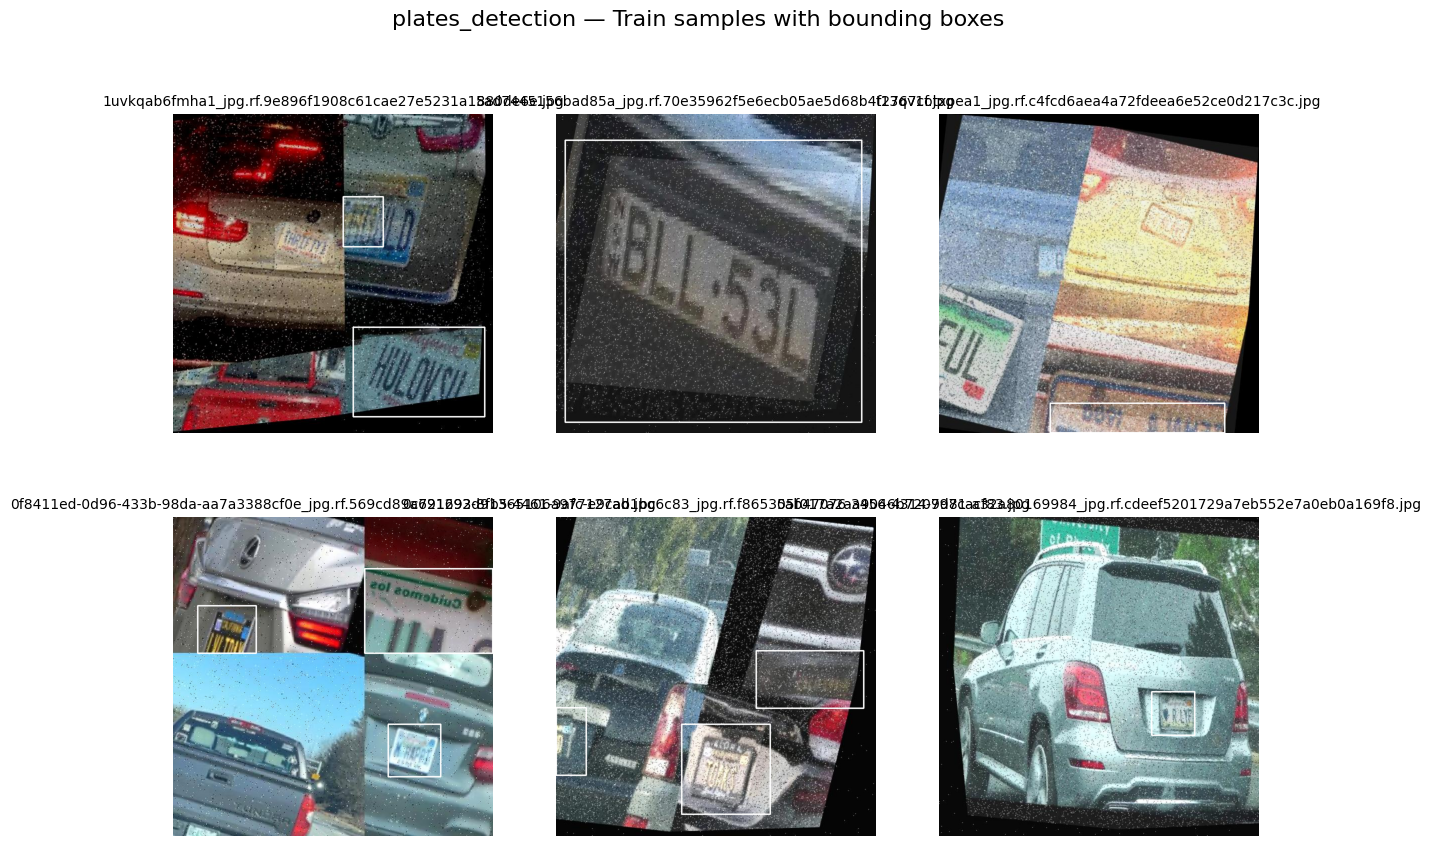

In [29]:
show_samples(
    dataset_root="/content/datasets/plates_detection",
    split="train",
    n=6,
    seed=7,
    title="plates_detection — Train samples with bounding boxes"
)


[saudi_cars | train] labels: 603, non-empty: 603


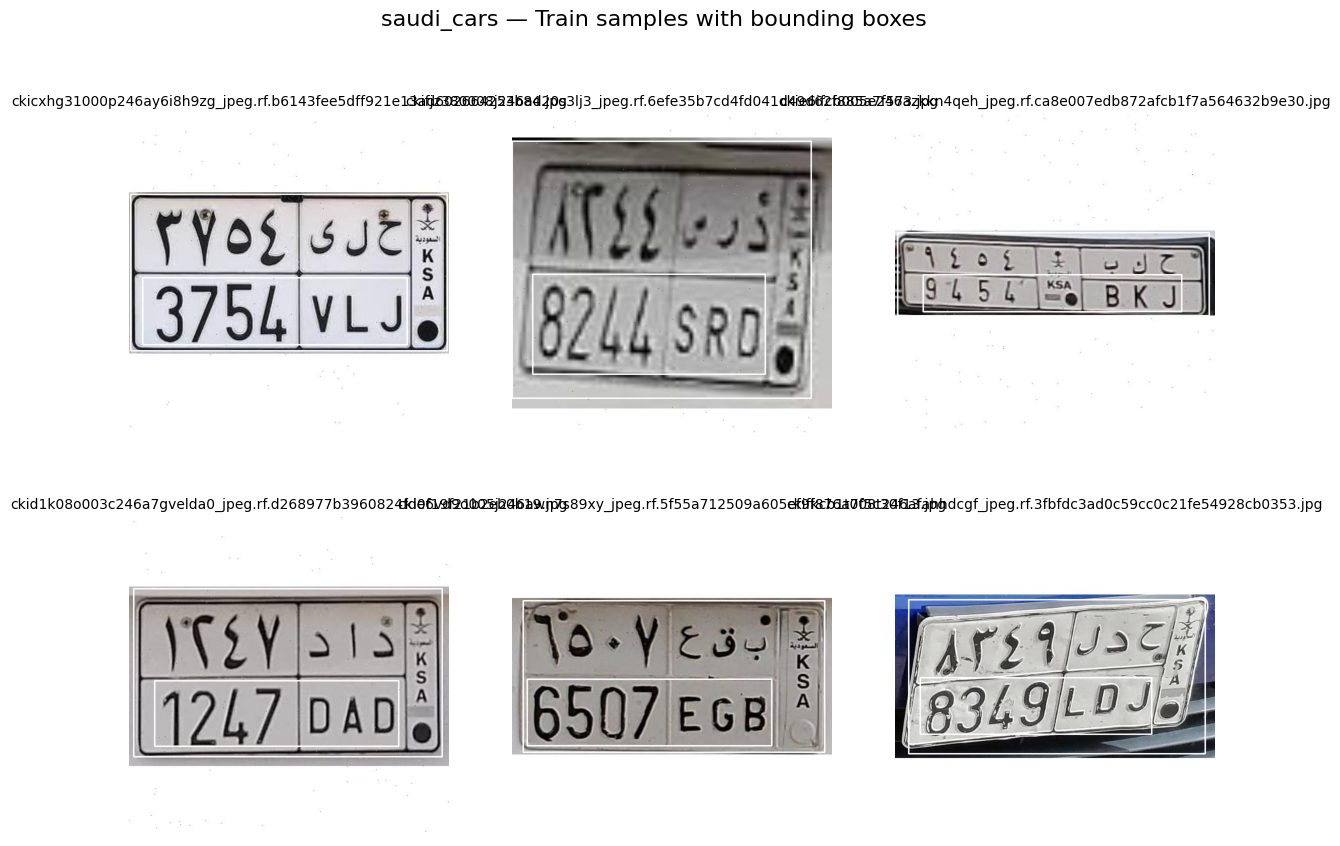

In [30]:
show_samples(
    dataset_root="/content/datasets/saudi_cars",
    split="train",
    n=6,
    seed=11,
    title="saudi_cars — Train samples with bounding boxes"
)


In [31]:
import glob, os

def label_stats(root):
    files = glob.glob(f"{root}/*/labels/*.txt")
    nonempty = sum(1 for f in files if os.path.getsize(f) > 0)
    empty = len(files) - nonempty
    return len(files), nonempty, empty

for ds in ["plates_detection", "saudi_cars"]:
    total, nonempty, empty = label_stats(f"/content/datasets/{ds}")
    print(ds, "label files:", total, "| non-empty:", nonempty, "| empty:", empty)


plates_detection label files: 3185 | non-empty: 3185 | empty: 0
saudi_cars label files: 686 | non-empty: 686 | empty: 0


In [32]:
print("plates_detection data.yaml:")
!cat /content/datasets/plates_detection/data.yaml
print("\nsaudi_cars data.yaml:")
!cat /content/datasets/saudi_cars/data.yaml


plates_detection data.yaml:
train: train/images
val: valid/images
test: test/images
nc: 1
names:
- LicensePlate
roboflow:
  workspace: haeun-kim-ri91b
  project: license-plate-detection-wienp
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/haeun-kim-ri91b/license-plate-detection-wienp/dataset/2

saudi_cars data.yaml:
train: train/images
val: valid/images
test: test/images
nc: 1
names:
- LicensePlate
roboflow:
  workspace: my-projects-lcb5t
  project: license-plate-recognition-b09ny
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/my-projects-lcb5t/license-plate-recognition-b09ny/dataset/1


In [34]:
base_yaml = "/content/datasets/plates_detection/data.yaml"

model = YOLO("yolov8n.pt")   # small + fast baseline
model.train(
    data=base_yaml,
    epochs=15,
    imgsz=640,
    batch=16,
    device=0,
    name="stageA_base"
)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/plates_detection/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=stageA_base2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7926116c11c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [35]:
model.val(data=base_yaml, split="test")

Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1678.3±688.2 MB/s, size: 77.5 KB)
val: Scanning /content/datasets/plates_detection/test/labels... 112 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 112/112 2.3Kit/s 0.0s
val: New cache created: /content/datasets/plates_detection/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 2.5it/s 2.8s
                   all        112        143      0.958      0.853      0.906      0.649
Speed: 5.2ms preprocess, 5.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7926e0cd20f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [36]:
saudi_yaml = "/content/datasets/saudi_cars/data.yaml"

ft = YOLO("runs/detect/stageA_base/weights/best.pt")
ft.train(
    data=saudi_yaml,
    epochs=10,
    imgsz=640,
    batch=16,
    lr0=1e-4,          # lower LR for fine-tuning
    device=0,
    name="stageB_saudi_finetune"
)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/saudi_cars/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/stageA_base/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=stageB_saudi_finetune, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=T

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7926ce256240>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [37]:
ft.val(data=saudi_yaml, split="test")


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1165.4±533.9 MB/s, size: 33.3 KB)
val: Scanning /content/datasets/saudi_cars/test/labels... 28 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 28/28 2.1Kit/s 0.0s
val: New cache created: /content/datasets/saudi_cars/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.7it/s 1.2s
                   all         28         41      0.907      0.947      0.946      0.803
Speed: 8.4ms preprocess, 11.0ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to /content/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792679b0b980>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [38]:
ft.predict(
    source="/content/datasets/saudi_cars/test/images",
    conf=0.25,
    save=True,
    name="pred_saudi_test"
)
print("Saved to: runs/detect/pred_saudi_test")



image 1/28 /content/datasets/saudi_cars/test/images/car102_jpg.rf.8c920254b06b847c5eb4390c2395f4ec.jpg: 640x640 1 LicensePlate, 7.3ms
image 2/28 /content/datasets/saudi_cars/test/images/car103_jpg.rf.b186d8988deacfb8cc0f47ceb237ba5c.jpg: 640x640 2 LicensePlates, 7.4ms
image 3/28 /content/datasets/saudi_cars/test/images/car105_jpg.rf.7519539cc8a303c18003dc2e692708ab.jpg: 640x640 1 LicensePlate, 7.3ms
image 4/28 /content/datasets/saudi_cars/test/images/car115_webp_jpg.rf.e0fdda476b41d2e697b463a0e55a77ef.jpg: 640x640 1 LicensePlate, 7.3ms
image 5/28 /content/datasets/saudi_cars/test/images/car117_webp_jpg.rf.484f04a81c7ad57fbc8e375fb3772286.jpg: 640x640 1 LicensePlate, 7.3ms
image 6/28 /content/datasets/saudi_cars/test/images/car144_webp_jpg.rf.990ba0a3f540d1b6c8c53a048b484ccb.jpg: 640x640 1 LicensePlate, 7.3ms
image 7/28 /content/datasets/saudi_cars/test/images/car153_webp_jpg.rf.f1a0af401d68bee67de3d464e11d3071.jpg: 640x640 (no detections), 7.3ms
image 8/28 /content/datasets/saudi_cars

In [42]:
mp, mr, map50, map5095 = metrics.box.mean_results()
print("\n=== Key Metrics (mean_results) ===")
print(f"mPrecision: {mp:.4f}")
print(f"mRecall:    {mr:.4f}")
print(f"mAP50:      {map50:.4f}")
print(f"mAP50-95:   {map5095:.4f}")



=== Key Metrics (mean_results) ===
mPrecision: 0.9066
mRecall:    0.9471
mAP50:      0.9458
mAP50-95:   0.8028


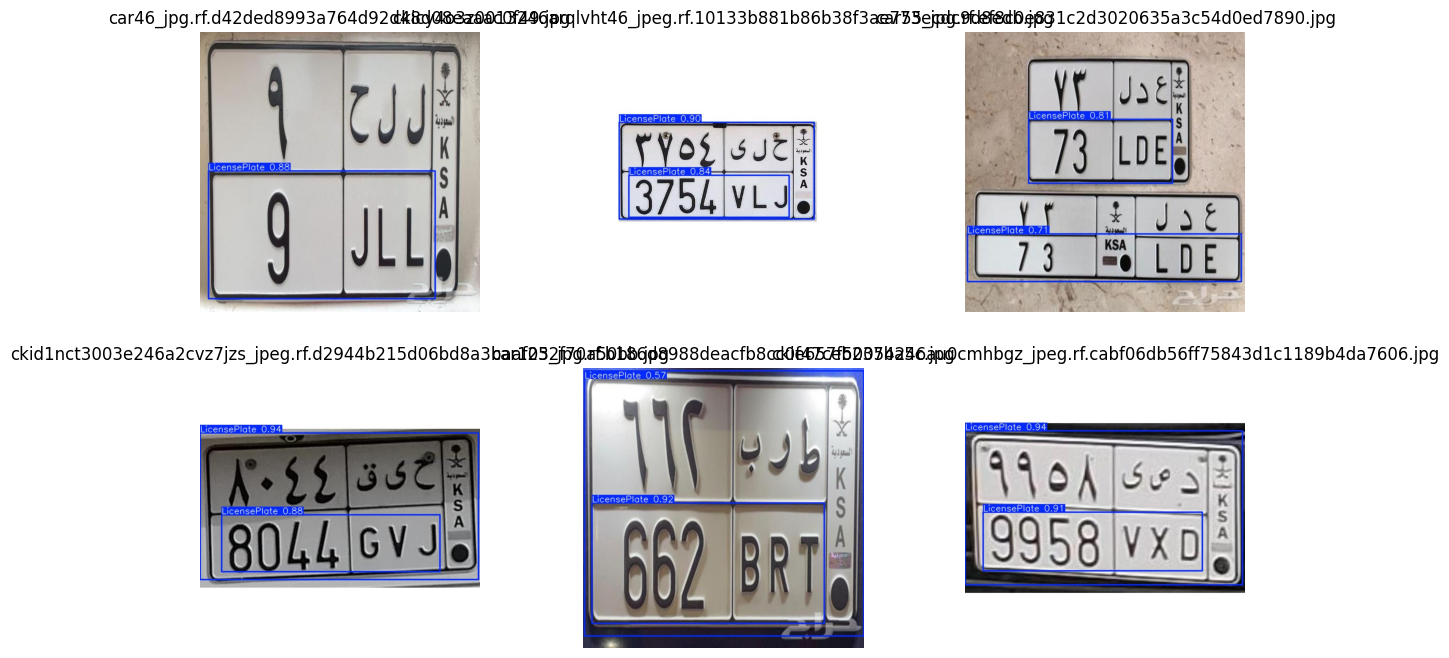

In [43]:
import glob, os, cv2
import matplotlib.pyplot as plt

pred_dir = "/content/runs/detect/pred_saudi_test"
imgs = glob.glob(os.path.join(pred_dir, "*.jpg"))[:6]

plt.figure(figsize=(14, 8))
for i, p in enumerate(imgs, 1):
    img = cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.axis("off")
    plt.title(os.path.basename(p))
plt.show()


# (ANPR part): add OCR on detected crops

In [44]:
from ultralytics import YOLO
import os, glob, cv2

model = YOLO("runs/detect/stageB_saudi_finetune/weights/best.pt")

src_dir = "/content/datasets/saudi_cars/test/images"
out_dir = "/content/plate_crops_saudi_test"
os.makedirs(out_dir, exist_ok=True)

imgs = glob.glob(os.path.join(src_dir, "*"))
saved = 0

results = model.predict(source=imgs, conf=0.25, iou=0.5, verbose=False)

for r in results:
    img_path = r.path
    img = cv2.imread(img_path)
    if img is None:
        continue

    boxes = r.boxes.xyxy.cpu().numpy() if r.boxes is not None else []
    for j, (x1, y1, x2, y2) in enumerate(boxes):
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        crop = img[max(0,y1):max(0,y2), max(0,x1):max(0,x2)]
        if crop.size == 0:
            continue
        base = os.path.splitext(os.path.basename(img_path))[0]
        cv2.imwrite(os.path.join(out_dir, f"{base}_crop{j}.jpg"), crop)
        saved += 1

print("Saved plate crops:", saved)
print("Crops folder:", out_dir)


Saved plate crops: 45
Crops folder: /content/plate_crops_saudi_test


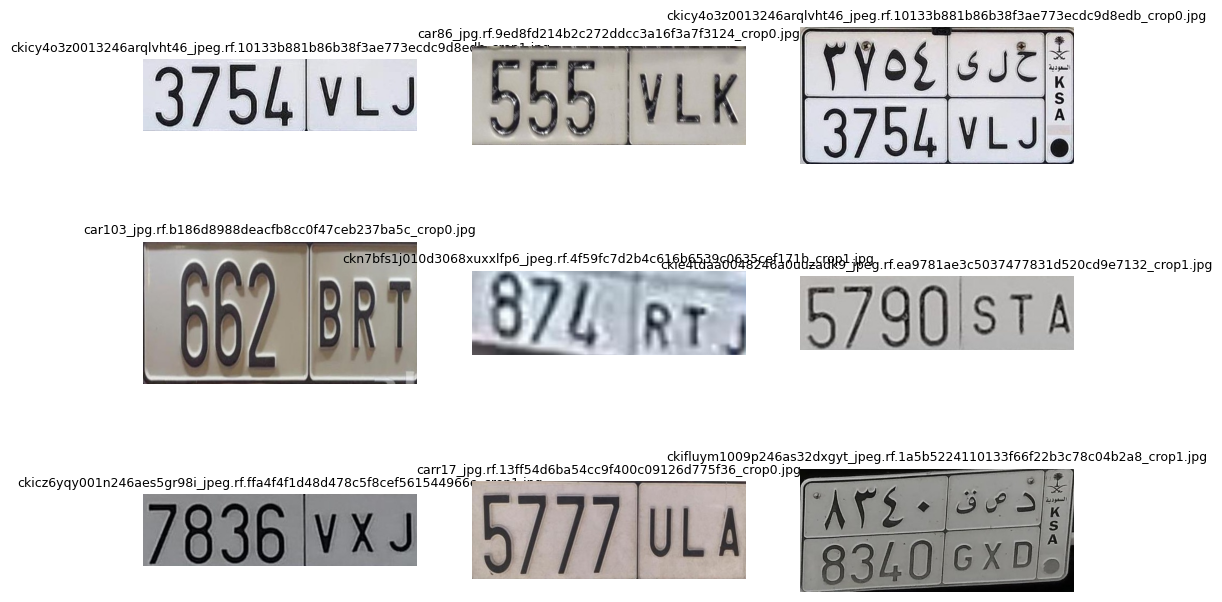

In [45]:
import matplotlib.pyplot as plt
import glob, os, cv2

crop_dir = "/content/plate_crops_saudi_test"
samples = glob.glob(os.path.join(crop_dir, "*.jpg"))[:9]

plt.figure(figsize=(12, 8))
for i, p in enumerate(samples, 1):
    img = cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, i)
    plt.imshow(img)
    plt.axis("off")
    plt.title(os.path.basename(p), fontsize=9)
plt.show()


In [46]:
!pip -q install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 30.0 MB/s eta 0:00:00


In [47]:
import easyocr
import glob, os, re
import cv2

crop_dir = "/content/plate_crops_saudi_test"
crops = sorted(glob.glob(os.path.join(crop_dir, "*.jpg")))

reader = easyocr.Reader(['en'], gpu=True)  # set gpu=False if it errors

def clean_text(t: str) -> str:
    # keep only A-Z and 0-9
    t = t.upper()
    t = re.sub(r"[^A-Z0-9]", "", t)
    return t

ocr_results = []
for p in crops:
    img = cv2.imread(p)
    if img is None:
        continue

    # EasyOCR returns list of (bbox, text, conf)
    out = reader.readtext(img, detail=1)
    if len(out) == 0:
        best_text, best_conf = "", 0.0
    else:
        # pick highest confidence
        best = max(out, key=lambda x: x[2])
        best_text, best_conf = best[1], float(best[2])

    ocr_results.append({
        "file": os.path.basename(p),
        "raw_text": best_text,
        "clean_text": clean_text(best_text),
        "conf": best_conf
    })

print("OCR done on crops:", len(ocr_results))
print("Sample outputs:")
for r in ocr_results[:10]:
    print(r["file"], "->", r["raw_text"], "| clean:", r["clean_text"], "| conf:", round(r["conf"], 3))


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteOCR done on crops: 45
Sample outputs:
car102_jpg.rf.8c920254b06b847c5eb4390c2395f4ec_crop0.jpg -> 977 | clean: 977 | conf: 1.0
car103_jpg.rf.b186d8988deacfb8cc0f47ceb237ba5c_crop0.jpg -> 682 |brT | clean: 682BRT | conf: 0.236
car103_jpg.rf.b186d8988deacfb8cc0f47ceb237ba5c_crop1.jpg -> A | clean: A | conf: 0.981
car105_jpg.rf.7519539cc8a303c18003dc2e692708ab_crop0.jpg -> 2222Llhb | clean: 2222LLHB | conf: 0.425
car115_webp_jpg.rf.e0fdda476b41d2e697b463a0e55a77ef_crop0.jpg -> Lajbir | clean: LAJBIR | conf: 0.086
car117_webp_jpg.rf.484f04a81c7ad57fbc8e375fb3772286_crop0.jpg -> LZOLIB R DL | clean: LZOLIBRDL | conf: 0.347
car144_webp_jpg.rf.990ba0a3f540d1b6c8c53a048b484ccb_crop0.jpg -> KSA | clean: KSA | conf: 0.935
car46_jpg.rf.d42ded8993a764d92d48d08eaaac0f49_crop0.jpg -> JLLL | clean: JLLL | conf: 0.943
car55_jpg.rf.ef8c0e831c2d3020635a3c54d0ed7890_crop0.jpg -> 73 | clean: 73 | conf: 1.0
car55_jpg.rf.ef8c0e831

In [48]:
import pandas as pd

df = pd.DataFrame(ocr_results)
csv_path = "/content/ocr_results_saudi_test.csv"
df.to_csv(csv_path, index=False)
print("Saved:", csv_path)
df.head()


Saved: /content/ocr_results_saudi_test.csv


file  raw_text clean_text  \
0  car102_jpg.rf.8c920254b06b847c5eb4390c2395f4ec...       977        977   
1  car103_jpg.rf.b186d8988deacfb8cc0f47ceb237ba5c...  682 |brT     682BRT   
2  car103_jpg.rf.b186d8988deacfb8cc0f47ceb237ba5c...         A          A   
3  car105_jpg.rf.7519539cc8a303c18003dc2e692708ab...  2222Llhb   2222LLHB   
4  car115_webp_jpg.rf.e0fdda476b41d2e697b463a0e55...    Lajbir     LAJBIR   

       conf  
0  0.999956  
1  0.235696  
2  0.981495  
3  0.424745  
4  0.086397

In [49]:
import glob, os

print("saudi_plates train sample:")
print([os.path.basename(x) for x in glob.glob("/content/datasets/saudi_plates/train/images/*")[:10]])


saudi_plates train sample:
['ckifk0r9c008k246adh7izqsv_jpeg.rf.761853db13eadf484b7125e1c9e67b69.jpg', 'ckicxd12u000n246awnhvd62f_jpeg.rf.d7e40d8ae8d2125c74d66fbafb132d23.jpg', 'car_83_jpg.rf.6854db3db9015d99d9a501d6b32e1942.jpg', 'car_5_jpg.rf.2808909a0d84a588005feb5b80d19939.jpg', 'ckid0upbn002s246a0fwgqsmb_jpeg.rf.570ed937e5ca26a513a99c9ebf2d39c0.jpg', 'ckicxvbyp000w246a0gvltjb6_jpeg.rf.ae6e21df2fb7119cc7bda88c3c9cf115.jpg', 'ckid0gu9c002i246a90xe99zp_jpeg.rf.60b140571fbc9ecbc9dcff577258d9fc.jpg', 'ckie9le91007a246aea9qjxi6_jpeg.rf.a26b43bf01d5569c73b9207f9aa5440c.jpg', 'ckicu4p9f0005246a6fsh626t_jpeg.rf.24151d1845272c1af8ce7db055aa4e09.jpg', 'ckiea2oi4007k246aioc0rrt4_jpeg.rf.d90b80259388053fe53f02abb252713b.jpg']


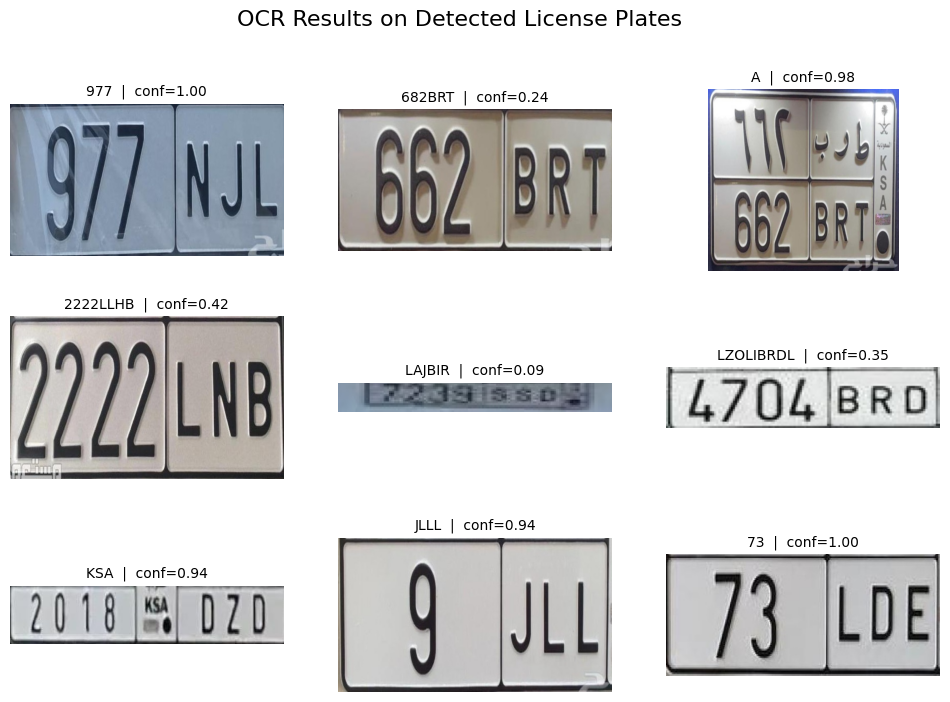

In [50]:
import easyocr
import cv2
import glob
import os
import re
import matplotlib.pyplot as plt

# Path to your cropped plates
CROP_DIR = "/content/plate_crops_saudi_test"
crops = sorted(glob.glob(os.path.join(CROP_DIR, "*.jpg")))[:9]

# OCR reader (English only)
reader = easyocr.Reader(['en'], gpu=True)

def clean_text(text):
    return re.sub(r"[^A-Z0-9]", "", text.upper())

plt.figure(figsize=(12, 8))

for i, img_path in enumerate(crops, 1):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = reader.readtext(img, detail=1)

    if results:
        best = max(results, key=lambda x: x[2])  # highest confidence
        text = clean_text(best[1])
        conf = best[2]
        title = f"{text}  |  conf={conf:.2f}"
    else:
        title = "NO TEXT  |  conf=0.00"

    plt.subplot(3, 3, i)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(title, fontsize=10)

plt.suptitle("OCR Results on Detected License Plates", fontsize=16)
plt.show()


# uploading to github code here

In [51]:
!git clone https://github.com/dgailh/RealTime-Object-Detection-CV2025.git


Cloning into 'RealTime-Object-Detection-CV2025'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [52]:
!ls -la

total 497528
drwxr-xr-x 1 root root      4096 Dec 18 19:26 .
drwxr-xr-x 1 root root      4096 Dec 18 18:17 ..
drwxr-xr-x 4 root root      4096 Dec  9 14:41 .config
drwxr-xr-x 5 root root      4096 Dec 18 18:19 datasets
-rw-r--r-- 1 root root      4434 Dec 18 19:01 ocr_results_saudi_test.csv
drwxr-xr-x 2 root root      4096 Dec 18 19:00 plate_crops_saudi_test
-rw-r--r-- 1 root root 450664370 Dec 18 17:29 plates_detection.zip
drwxr-xr-x 3 root root      4096 Dec 18 19:26 RealTime-Object-Detection-CV2025
drwxr-xr-x 3 root root      4096 Dec 18 18:19 runs
drwxr-xr-x 1 root root      4096 Dec  9 14:42 sample_data
-rw-r--r-- 1 root root  36840116 Dec 18 15:17 Saudi_PlatesNcars.zip
-rw-r--r-- 1 root root   9741037 Dec 18 15:17 saudi_plates.zip
-rw-r--r-- 1 root root   5613764 Dec 18 18:19 yolo11n.pt
-rw-r--r-- 1 root root   6549796 Dec 18 18:19 yolov8n.pt


In [53]:
%cd RealTime-Object-Detection-CV2025

/content/RealTime-Object-Detection-CV2025


In [54]:
!ls -la

total 16
drwxr-xr-x 3 root root 4096 Dec 18 19:26 .
drwxr-xr-x 1 root root 4096 Dec 18 19:26 ..
drwxr-xr-x 8 root root 4096 Dec 18 19:26 .git
-rw-r--r-- 1 root root  187 Dec 18 19:26 README.md


In [57]:
!ls -la /content | grep ipynb